In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,Train


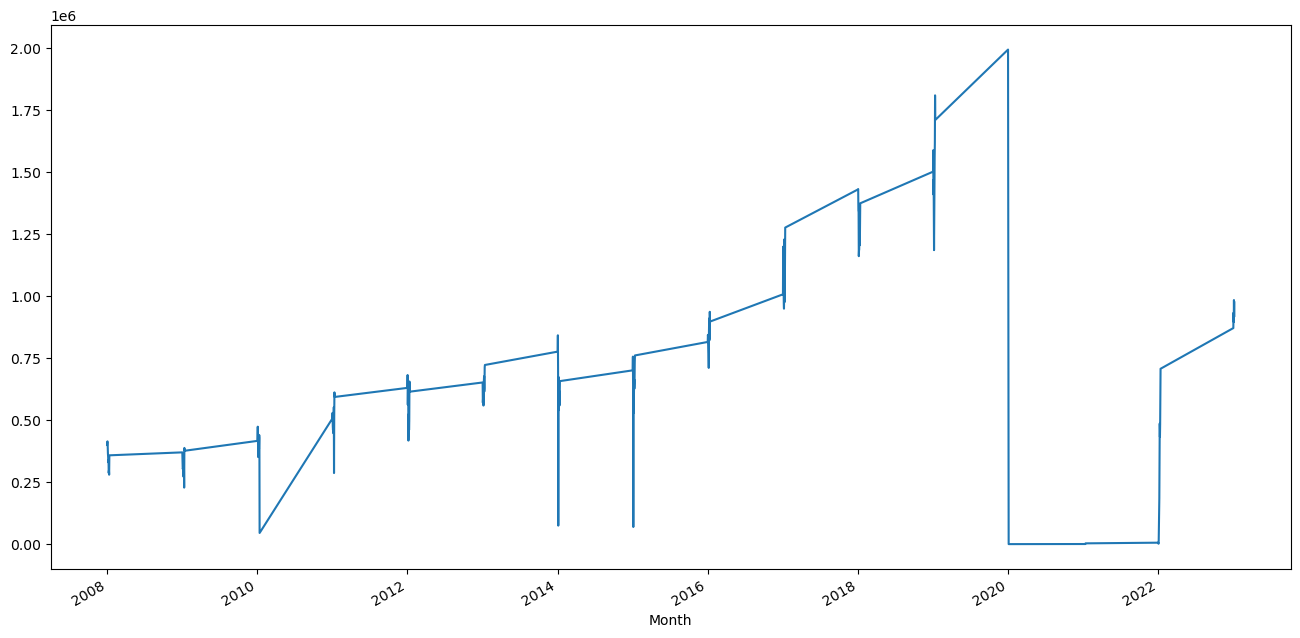

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.18 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.35 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17970D+01    |proj g|=  2.70520D-05


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   35      1      3      1     0     0   1.735D-04   1.180D+01
  F =   11.797038233453334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1580.803
Date:                            Wed, 23 Aug 2023   AIC                           3231.606
Time:                                    21:45:10   BIC                           3329.459
Sample:                                         0   HQIC                          3271.348
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts           -65.8714    361.137     -0.182      0.855    -773.687     641.944
Number of Comments         21.9965     36.156      0.608      0.543     -48.867      92.860
Airbnb Vietnam          -1340.6619   3141.570     -0.427      0.670   -7498.026    4816.702
Vietnam restaurant       4278.6869   3488.009      1.227      0.220   -2557.685    1.11e+04
Shopping in Hanoi        -507.1968   3644.934     -0.139      0.889   -7651.135    6636.742
Shopping in Ho Chi Minh   593.0402   4082.682      0.145      0.885   -7408.870    8594.951
 Vietnam tour           -3579.4283   5098.671     -0.702      0.483   -1.36e+04    6413.783
 Skyscanner              2069.7614   6522.726      0.317      0.751   -1.07e+04    1.49e+04
 Vietnam visa            -835.6061   4363.647     -0.191      0.848   -9388.198    7716.986
 Vietnam airport         2525.0572   3893.326      0.649      0.517   -5105.722    1.02e+04
 Vietnam flights          -22.8645   4729.894     -0.005      0.996   -9293.287    9247.558
 Danang airport         -1106.0622   2299.788     -0.481      0.631   -5613.565    3401.440
 Hoi An                 -2188.0979   2775.467     -0.788      0.430   -7627.914    3251.718
 Vietnam weather          980.7518   2524.163      0.389      0.698   -3966.517    5928.021
 Visa for Vietnam        1505.4000   5370.367      0.280      0.779   -9020.326     1.2e+04
 Sgn airport              858.4561   2478.902      0.346      0.729   -4000.103    5717.015
 Phu Quoc                2882.5253   2691.788      1.071      0.284   -2393.281    8158.332
 Vietnam itinerary      -1661.3867   3056.719     -0.544      0.587   -7652.445    4329.672
 Vietnam trip            3633.5621   2899.711      1.253      0.210   -2049.766    9316.891
 Things to do in Hue     3156.8302   3573.441      0.883      0.377   -3846.985    1.02e+04
 Vietnam backpackers    -4618.6345   4331.804     -1.066      0.286   -1.31e+04    3871.545
NegativityQDAP           2.181e+05   1.49e+05      1.465      0.143   -7.37e+04     5.1e+05
PositivityQDAP           2.804e+05   1.55e+05      1.809      0.070   -2.34e+04    5.84e+05
TOPIC 1                 -1.387e+05    1.3e+05     -1.067      0.286   -3.93e+05    1.16e+05
TOPIC 2                 -1.867e+05   7.65e+04     -2.442      0.015   -3.37e+05   -3.69e+04
TOPIC 3                 -1.062e+04   7.91e+04     -0.134      0.893   -1.66e+05    1.44e+05
TOPIC 4                 -9.005e+04   4.95e+04     -1.817      0.069   -1.87e+05    7063.011
TOPIC 5                 -4.177e+04   6.44e+04     -0.649      0.516   -1.68e+05    8.44e+04
TOPIC 6                 -5.024e+04   1.15e+05     -0.437      0.662   -2.75e+05    1.75e+05
TOPIC 7                 -7.614e+04   5.78e+04     -1.318      0.188   -1.89e+05    3.71e+04
TOPIC 8                 -6.111e+04   6.45e+04     -0.948      0.343   -1.87e+05    6.52e+04
TOPIC

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1114367.1427503552


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 994788.0860755553


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.1677018694237477e+21


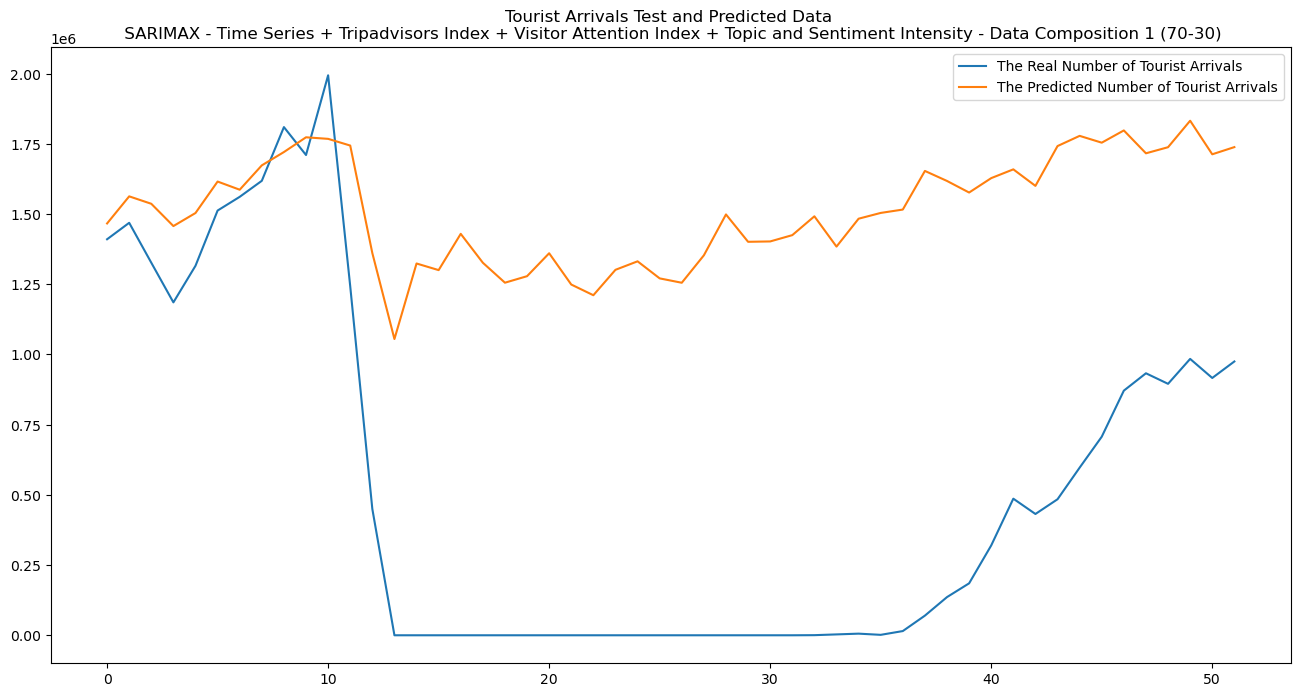

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 1 (70-30)")
plt.legend()
plt.show()